# Exercise 7

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

# Use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv('agaricus-lepiota.data')
df.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# PCA
X = pd.get_dummies(df.drop('edibility',1))
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

In [5]:
# K-means
def cluster_score(cluster_amount):
    clusterer = KMeans(n_clusters=cluster_amount)
    clusterer.fit(X)
    clusterer_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusterer_labels)
    return silhouette_avg

for i in range(2,10):
    print("For n_clusters =", i,
          "The average silhouette_score is :", cluster_score(i))

For n_clusters = 2 The average silhouette_score is : 0.5836205540866848
For n_clusters = 3 The average silhouette_score is : 0.7632728065468769
For n_clusters = 4 The average silhouette_score is : 0.6696076480730845
For n_clusters = 5 The average silhouette_score is : 0.646270192446229
For n_clusters = 6 The average silhouette_score is : 0.5866355600840962
For n_clusters = 7 The average silhouette_score is : 0.5382532582701827
For n_clusters = 8 The average silhouette_score is : 0.5197135955189389
For n_clusters = 9 The average silhouette_score is : 0.47964277487677487


# Plot this metric while increasing the number of clusters, e.g., $k=2..30$

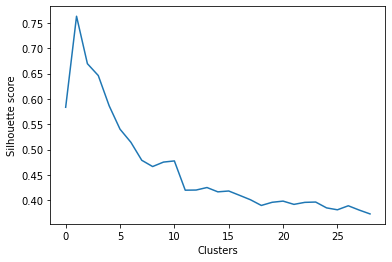

In [6]:
scores = []
for i in range(2,31):
    scores.append(cluster_score(i))

plt.plot(scores)
plt.ylabel('Silhouette score')
plt.xlabel('Clusters')
plt.show()

# Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

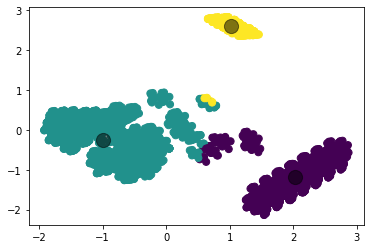

In [7]:
# Found that 3 is the optimal number of clusters
clusterer = KMeans(n_clusters=3)
clusterer.fit(X)
clusterer_labels = clusterer.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusterer_labels, s=50, cmap='viridis')
centers = clusterer.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
